## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import ttest_ind

# Read the data from the file
data = pd.read_csv("reduced_project_info.csv")

# Drop rows with missing values
data.dropna(subset=['words', 'kudos', 'comments', 'bookmarks', 'hits'], inplace=True)

# Replace infinite values with NaN and drop rows with NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['words', 'kudos', 'comments', 'bookmarks', 'hits'], inplace=True)

### Question 0: Summary Statistics
The summary statistics we will provide are:
- number of fanfics in the data set
- average word count
- % of fics finished
- number of fics for each rating
- average number of hits
- average number of kudos
- average number of comments
- average number of bookmarks

In [2]:
# Number of fanfics in the dataset
num_fanfics = len(data)

# Average word count
avg_word_count = data['words'].mean()

# Percentage of fics finished
percent_finished = 100 - (data['finished'].sum() / num_fanfics) * 100

# Number of fics for each rating
rating_counts = data['rating'].value_counts()

# Average number of hits
avg_hits = data['hits'].mean()

# Average number of kudos
avg_kudos = data['kudos'].mean()

# Average number of comments
avg_comments = data['comments'].mean()

# Average number of bookmarks
avg_bookmarks = data['bookmarks'].mean()

# Print summary statistics
print("Summary Statistics")
print(f"- Number of fanfics in the dataset: {num_fanfics}")
print(f"- Average word count: {avg_word_count:.2f}")
print(f"- Percentage of fics finished: {percent_finished:.2f}%")
print("- Number of fics for each rating:")
print(rating_counts)
print(f"- Average number of hits: {avg_hits:.2f}")
print(f"- Average number of kudos: {avg_kudos:.2f}")
print(f"- Average number of comments: {avg_comments:.2f}")
print(f"- Average number of bookmarks: {avg_bookmarks:.2f}")

Summary Statistics
- Number of fanfics in the dataset: 93716
- Average word count: 3724.02
- Percentage of fics finished: 5.21%
- Number of fics for each rating:
rating
 0.0    31606
 1.0    27496
 3.0    17481
 2.0    14347
-1.0     2786
Name: count, dtype: int64
- Average number of hits: 1474.47
- Average number of kudos: 57.48
- Average number of comments: 3.96
- Average number of bookmarks: 8.84


### Question 0.5: How many fics over time?
To answer this question we will create a plot showing the total number of fics added at the end of each month.

We are also curious if the corona-virus pandemic starting had an effect on the rate of fanfic added, we will create a secondary chart zoomed in on the months of 2019 and onwards to investigate this.

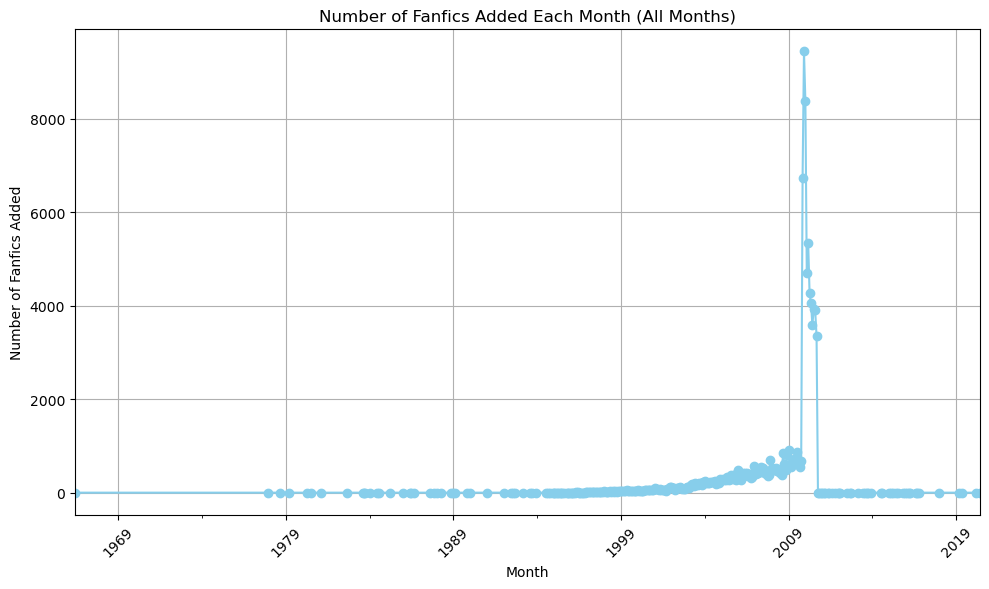

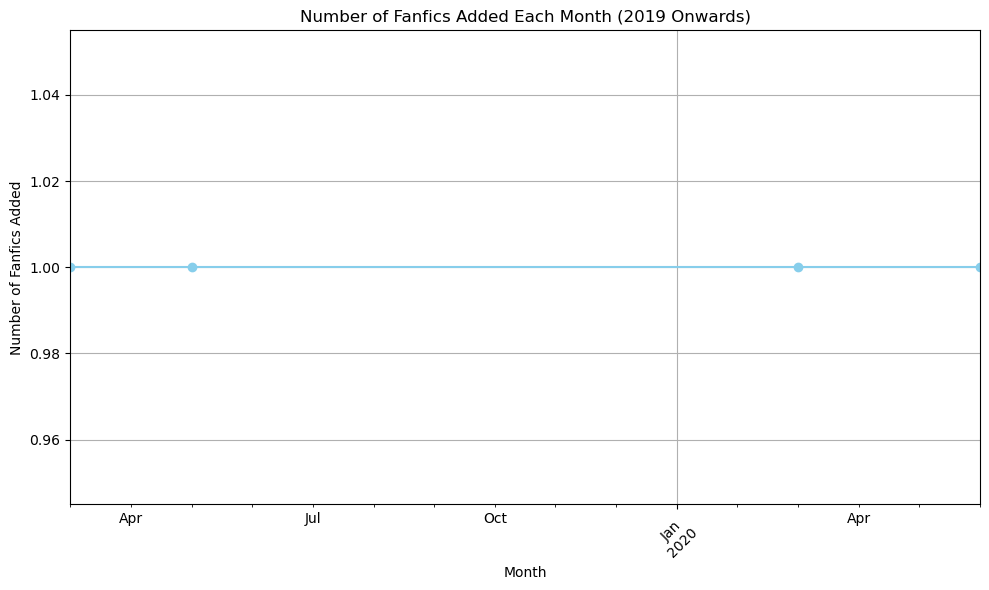

In [3]:
# Convert "date" column to datetime format, handling inconsistent formats
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Remove rows with NaT values (if any)
data.dropna(subset=['date'], inplace=True)

# Group data by month and year and count number of fanfics published in each month
fics_added_all_months = data.groupby(data['date'].dt.to_period('M')).size()

# Plot the number of fanfics added in each month (all months)
plt.figure(figsize=(10, 6))
fics_added_all_months.plot(marker='o', color='skyblue')
plt.title('Number of Fanfics Added Each Month (All Months)')
plt.xlabel('Month')
plt.ylabel('Number of Fanfics Added')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Creating the second chart
# Filter data for months of 2019 onwards
data_2019_onwards = data[data['date'].dt.year >= 2019]

# Group filtered data by month and year and count number of fanfics published in each month
fics_added_2019_onwards = data_2019_onwards.groupby(data_2019_onwards['date'].dt.to_period('M')).size()

# Plot the number of fanfics added in each month (2019 onwards)
plt.figure(figsize=(10, 6))
fics_added_2019_onwards.plot(marker='o', color='skyblue')
plt.title('Number of Fanfics Added Each Month (2019 Onwards)')
plt.xlabel('Month')
plt.ylabel('Number of Fanfics Added')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Answering Question 0.5:
This data looks really weird sorry

### Question 1: Are long fanfics more popular?
To answer this question we will create bar charts comparing the words in a fanfic to our four canidate measures of the popularity of a fanfic - kudos, comments, bookmarks, and hits. Then we will calculate the correlation coefficient between length and our measures of popularity.

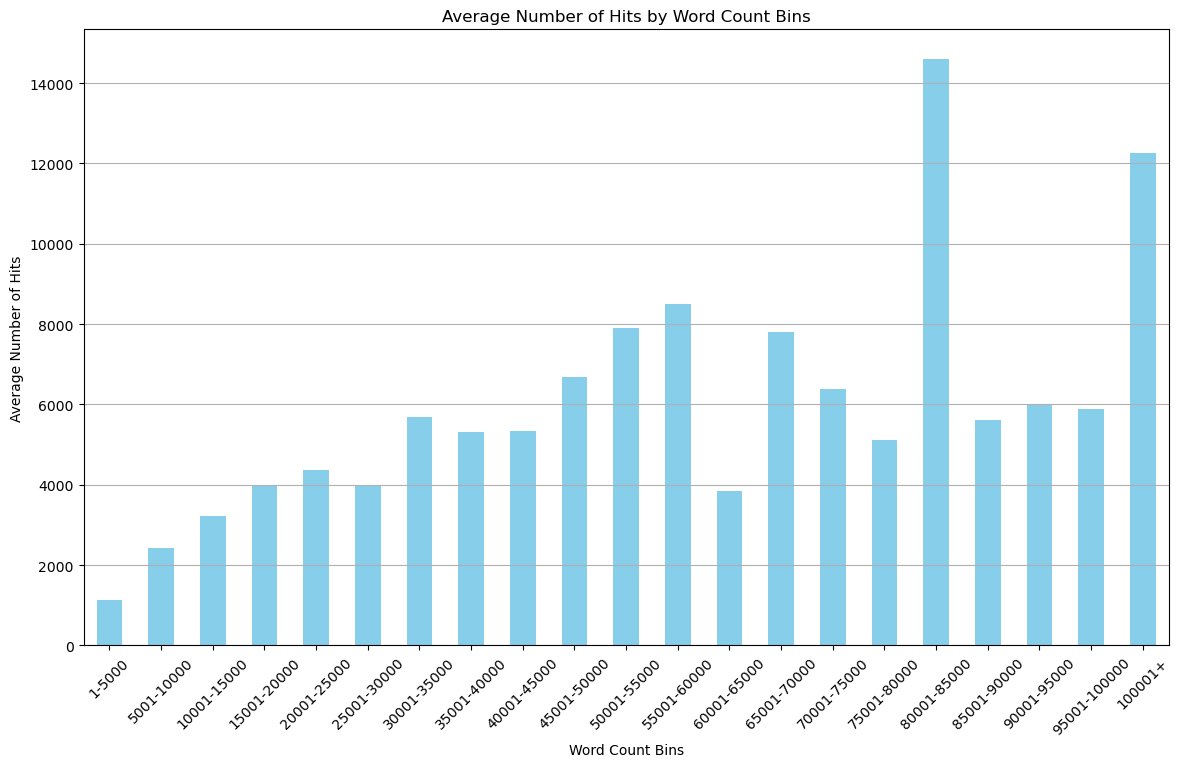

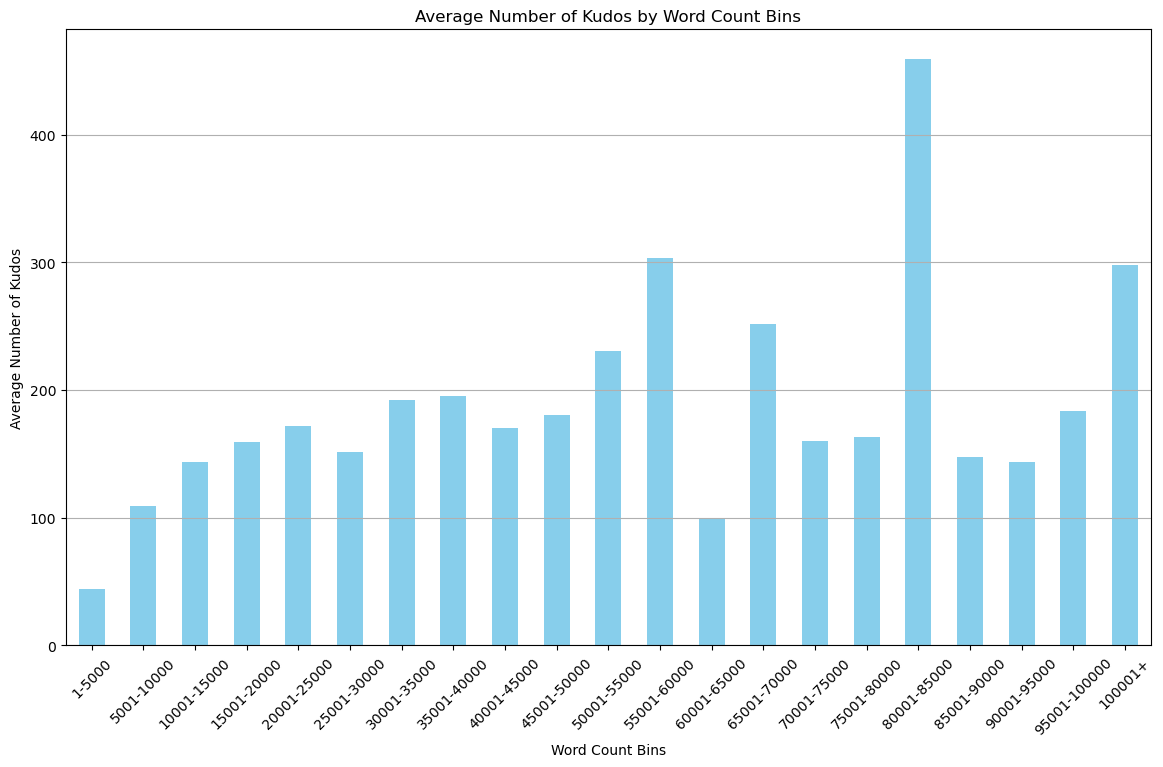

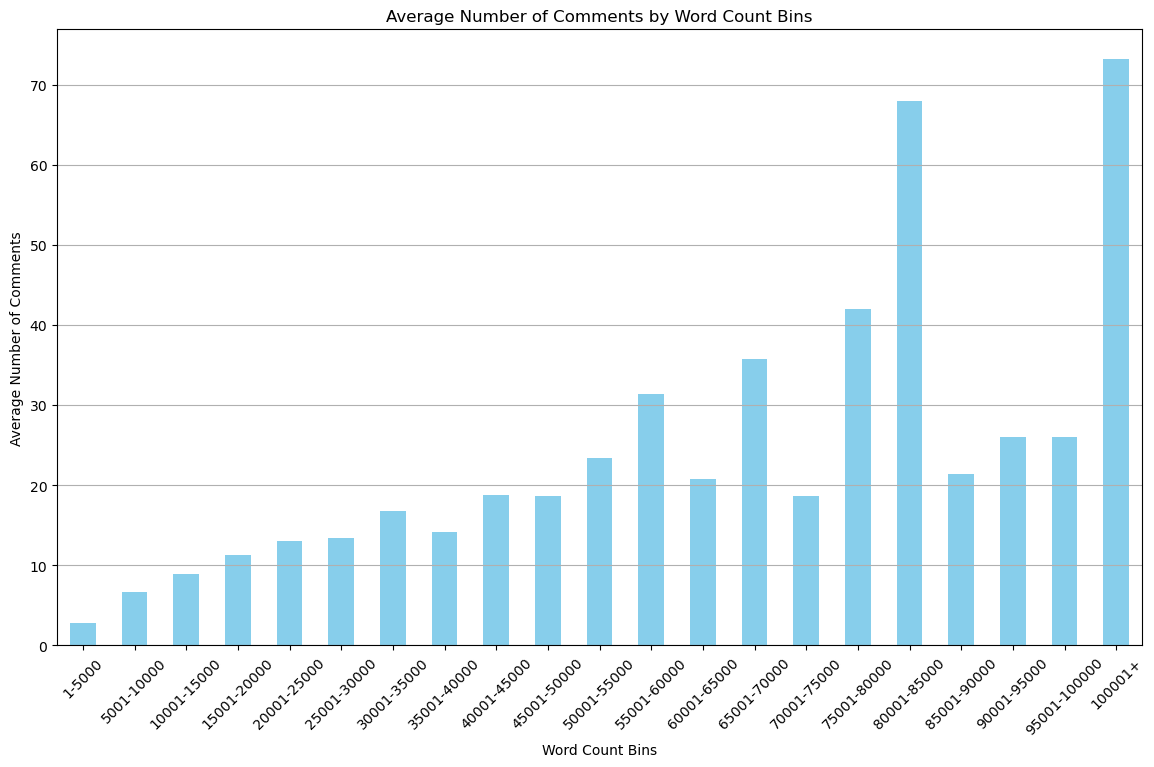

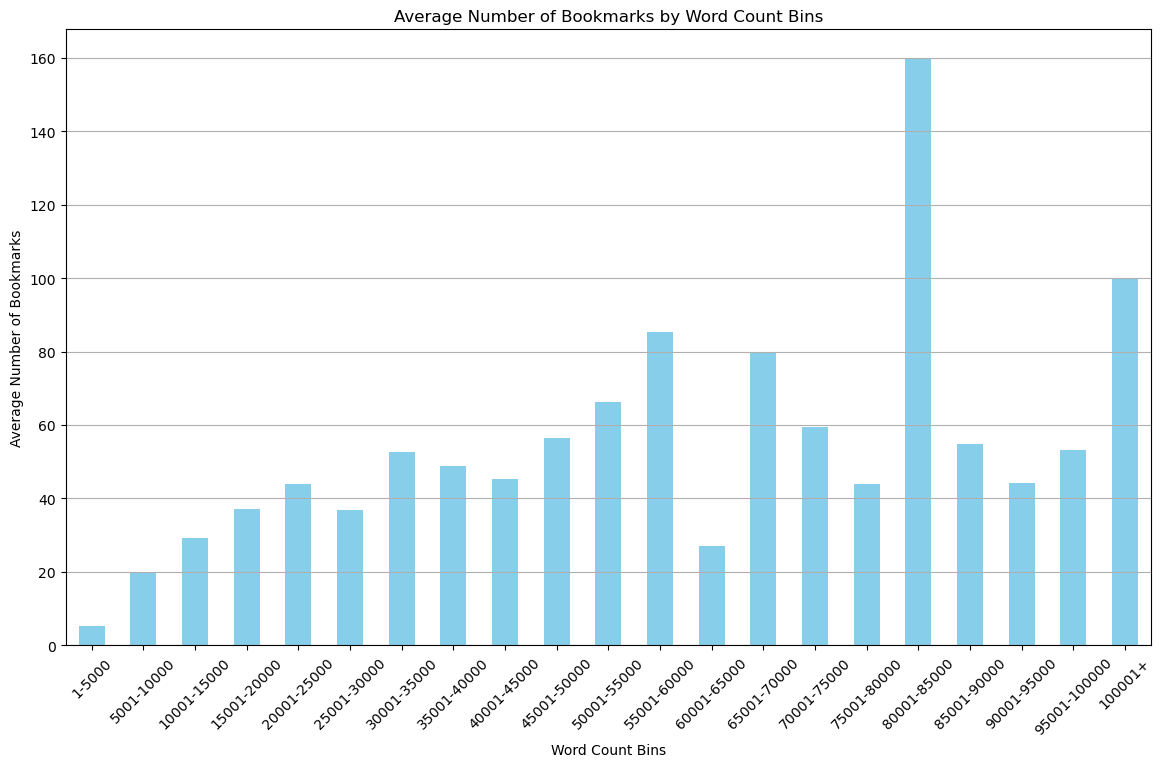

Pearson correlation coefficient (kudos): 0.12
P-value (kudos): 0.0000
Pearson correlation coefficient (comments): 0.30
P-value (comments): 0.0000
Pearson correlation coefficient (bookmarks): 0.15
P-value (bookmarks): 0.0000
Pearson correlation coefficient (hits): 0.17
P-value (hits): 0.0000


In [4]:
# Define the bins for word counts
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, float('inf')]

# Create a new column in the DataFrame to represent the bin for each fanfic
data['word_bin'] = pd.cut(data['words'], bins=bins, labels=['1-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30001-35000', '35001-40000', '40001-45000', '45001-50000', '50001-55000', '55001-60000', '60001-65000', '65001-70000', '70001-75000', '75001-80000', '80001-85000', '85001-90000', '90001-95000', '95001-100000', '100001+'])

# Group the DataFrame by the word bins and calculate the average number of hits for each bin
average_hits_by_bin = data.groupby('word_bin')['hits'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_hits_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Hits by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Hits')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of kudos for each bin
average_kudos_by_bin = data.groupby('word_bin')['kudos'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_kudos_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Kudos by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Kudos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of comments for each bin
average_comments_by_bin = data.groupby('word_bin')['comments'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_comments_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Comments by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of bookmarks for each bin
average_bookmarks_by_bin = data.groupby('word_bin')['bookmarks'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_bookmarks_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Bookmarks by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Bookmarks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Calculate Pearson correlation coefficient for kudos
corr_kudos, p_value_kudos = pearsonr(data['words'], data['kudos'])
print(f"Pearson correlation coefficient (kudos): {corr_kudos:.2f}")
print(f"P-value (kudos): {p_value_kudos:.4f}")

# Calculate Pearson correlation coefficient for comments
corr_comments, p_value_comments = pearsonr(data['words'], data['comments'])
print(f"Pearson correlation coefficient (comments): {corr_comments:.2f}")
print(f"P-value (comments): {p_value_comments:.4f}")

# Calculate Pearson correlation coefficient and for bookmarks
corr_bookmarks, p_value_bookmarks = pearsonr(data['words'], data['bookmarks'])
print(f"Pearson correlation coefficient (bookmarks): {corr_bookmarks:.2f}")
print(f"P-value (bookmarks): {p_value_bookmarks:.4f}")

# Calculate Pearson correlation coefficient and for hits
corr_hits, p_value_hits = pearsonr(data['words'], data['hits'])
print(f"Pearson correlation coefficient (hits): {corr_hits:.2f}")
print(f"P-value (hits): {p_value_hits:.4f}")


### Answering Question 1:
Looking at the bar charts, we see that as word count goes up, notions of popularity tend to go up.

All four measures of popularity - kudos, comments, bookmarks, and hits - were positively correlated with length.

These tests both suggest that as a fanfic gets longer it gets more popular.

### Question 2: Are explicit fanfics more popular?
To answer this question we will create bar charts comparing a fanfic's rating to our four canidate measures of popularity - hits, kudos, comments, and bookmarks. We will then report if the differences in average popularity between ratings are statistically significant.

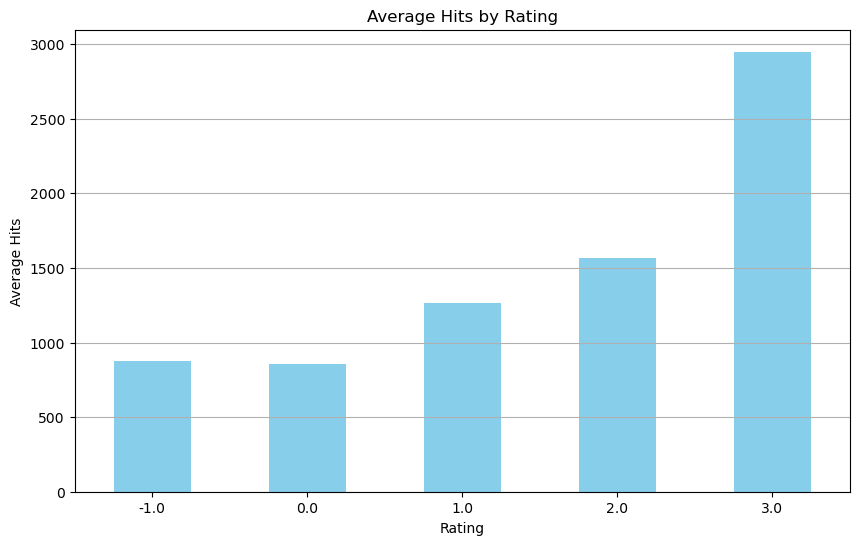

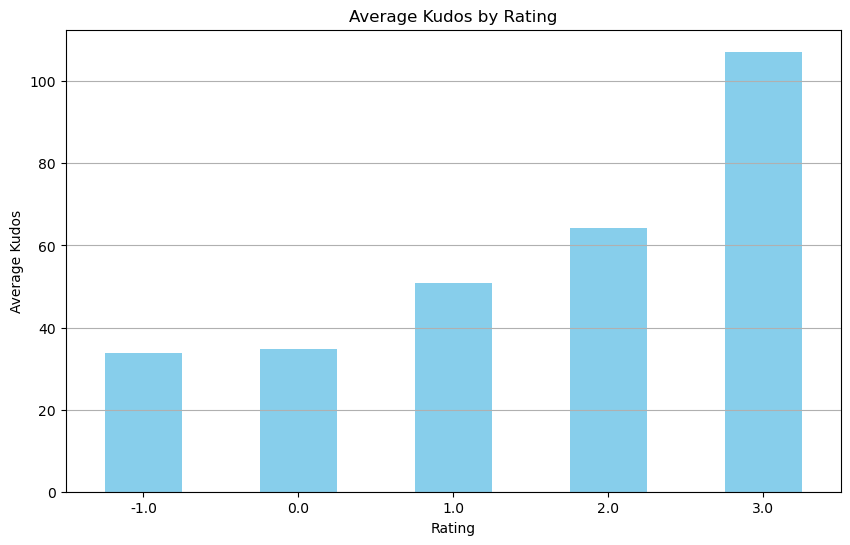

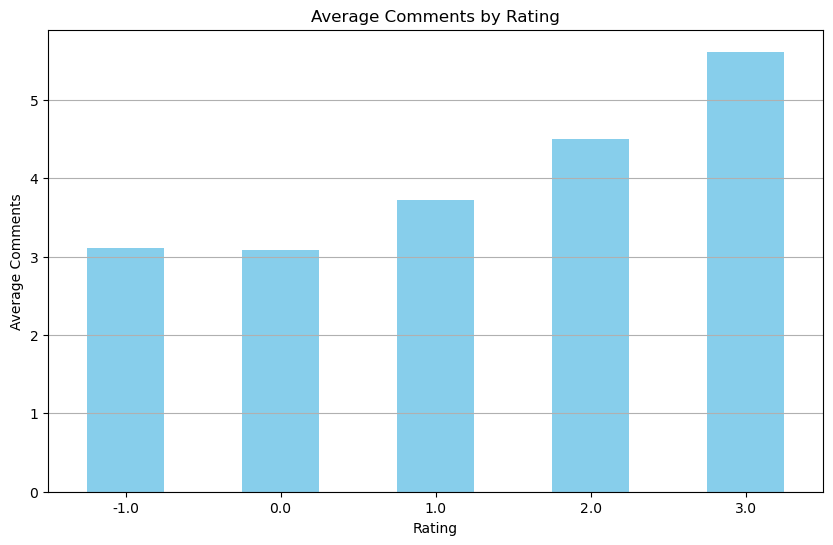

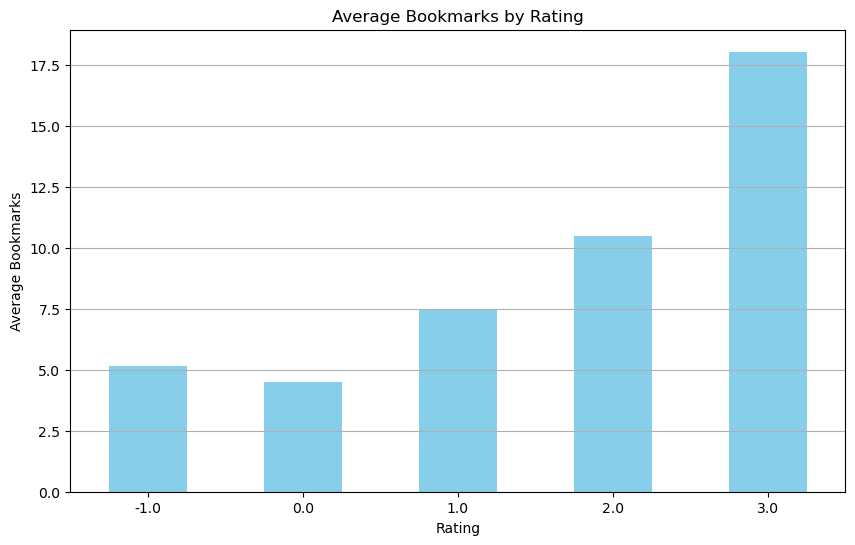

In [5]:
# Group the DataFrame by rating and calculate the average popularity metrics for each rating
average_popularity_by_rating = data.groupby('rating').agg({'hits': 'mean', 'kudos': 'mean', 'comments': 'mean', 'bookmarks': 'mean'})

# Plot the bar charts for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    average_popularity_by_rating[metric].plot(kind='bar', color='skyblue')
    plt.title(f'Average {metric.capitalize()} by Rating')
    plt.xlabel('Rating')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()


In [6]:
# Perform t-test to compare the average popularity metrics between different ratings
for metric in metrics:
    print(f"\nT-test results for {metric.capitalize()}:\n")
    for i in range(len(average_popularity_by_rating.index)):
        for j in range(i+1, len(average_popularity_by_rating.index)):
            rating1 = average_popularity_by_rating.index[i]
            rating2 = average_popularity_by_rating.index[j]
            avg1 = data[data['rating'] == rating1][metric]
            avg2 = data[data['rating'] == rating2][metric]
            t_statistic, p_value = ttest_ind(avg1, avg2)
            print(f"T-test between ratings {rating1} and {rating2}:")
            print(f"  - T-statistic: {t_statistic:.2f}")
            print(f"  - P-value: {p_value:.4f}")
            if p_value < 0.05:
                print("  - Statistically significant difference (p < 0.05)")
            else:
                print("  - No statistically significant difference (p >= 0.05)")



T-test results for Hits:

T-test between ratings -1.0 and 0.0:
  - T-statistic: 0.50
  - P-value: 0.6178
  - No statistically significant difference (p >= 0.05)
T-test between ratings -1.0 and 1.0:
  - T-statistic: -6.44
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings -1.0 and 2.0:
  - T-statistic: -5.13
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings -1.0 and 3.0:
  - T-statistic: -12.60
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings 0.0 and 1.0:
  - T-statistic: -19.66
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings 0.0 and 2.0:
  - T-statistic: -16.71
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings 0.0 and 3.0:
  - T-statistic: -41.36
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings 1.0 and 2.0:
  - T-sta

### Answering Question 2:
The bar charts show that rating does impact popularity:
- Generally, ((rating 3)) is most popular, followed by ((rating 2)) then ((rating 1)) then ((rating -1)) and finally ((rating 0)).
- All of the differences in popularity between rating are highly statistically significant, with large t-statistic values as well.

### Question 3: Are finished works more popular?
To answer this question we will compare the average popularity of finished v. unfinished fanfictions for each of the four candidate measures of popularity, and report on whether the differences are statistically significant.

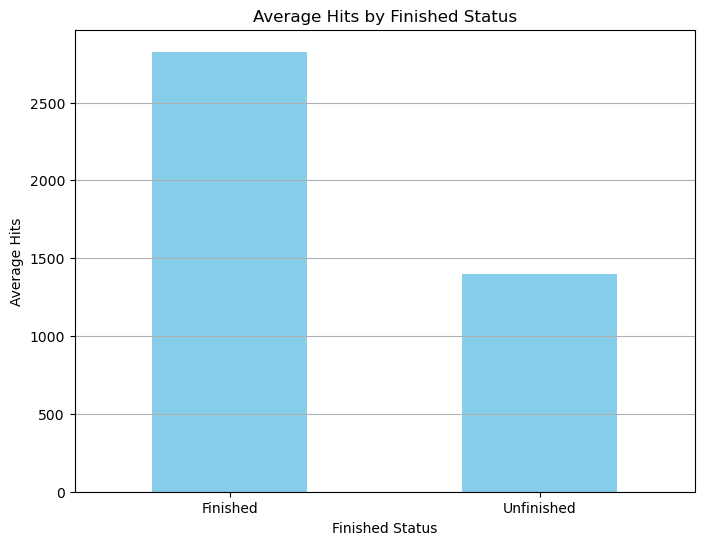

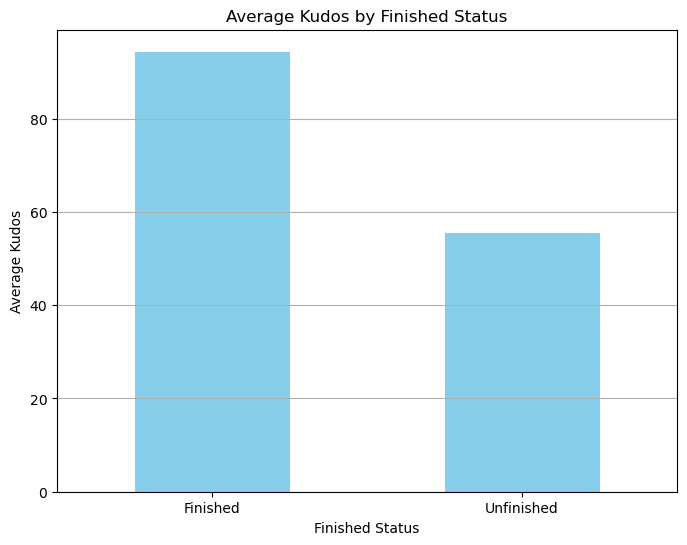

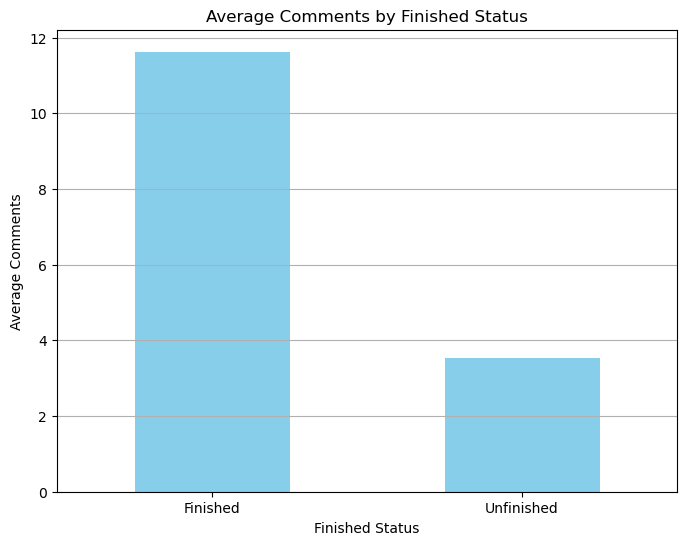

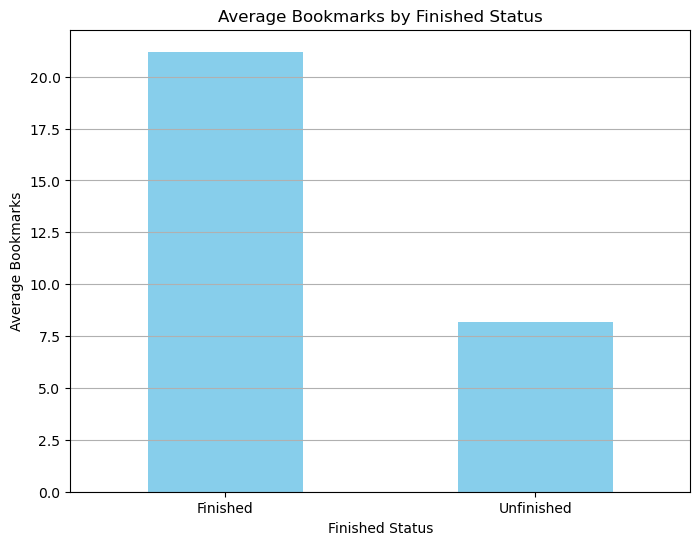

T-test results:
T-test for Hits:
  - T-statistic: 18.95
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Kudos:
  - T-statistic: 11.29
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Comments:
  - T-statistic: 35.63
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Bookmarks:
  - T-statistic: 15.75
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)


In [7]:
# Group the DataFrame by "finished" column and calculate the average popularity metrics for each group
average_popularity_by_finished = data.groupby('finished').agg({'hits': 'mean', 'kudos': 'mean', 'comments': 'mean', 'bookmarks': 'mean'})

# Plot bar charts comparing the average popularity of finished vs. unfinished fanfictions for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    average_popularity_by_finished[metric].plot(kind='bar', color='skyblue')
    plt.title(f'Average {metric.capitalize()} by Finished Status')
    plt.xlabel('Finished Status')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks([0, 1], ['Finished', 'Unfinished'], rotation=0)  # Customize x-axis labels
    plt.grid(axis='y')
    plt.show()

# Perform t-test to compare the average popularity metrics between finished and unfinished fanfictions
print("T-test results:")
for metric in metrics:
    avg_finished = data[data['finished'] == 0][metric]
    avg_unfinished = data[data['finished'] == 1][metric]
    t_statistic, p_value = ttest_ind(avg_finished, avg_unfinished)
    print(f"T-test for {metric.capitalize()}:")
    print(f"  - T-statistic: {t_statistic:.2f}")
    print(f"  - P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  - Statistically significant difference (p < 0.05)")
    else:
        print("  - No statistically significant difference (p >= 0.05)")


### Answering Question 3:
The bar charts show that finished works are more popular by every metric than unfinished works. Additionally, the difference in popularity between finished and unfinished works is very statistically significant, with large t-statistic values as well.

### Question 4: Are English fanfics more popular?
To answer this question, we will create a bar chart comparing fanfics written in English with those written in some other language for all four metrics of popularity, and see if the differences in popularity are statistically significant.

In [8]:
# Calculate the average popularity metrics for English and non-English fanfictions
avg_popularity_english = data[data['language'] == 1].mean()
avg_popularity_non_english = data[data['language'] != 1].mean()

# Plot bar charts comparing the average popularity of English vs. non-English fanfictions for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.bar(['English', 'Non-English'], [avg_popularity_english[metric], avg_popularity_non_english[metric]], color=['skyblue', 'orange'])
    plt.title(f'Average {metric.capitalize()} by Language')
    plt.xlabel('Language')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.grid(axis='y')
    plt.show()

# Perform t-test to compare the average popularity metrics between English and non-English fanfictions
print("T-test results:")
for metric in metrics:
    avg_english = data[data['language'] == 1][metric]
    avg_non_english = data[data['language'] != 1][metric]
    t_statistic, p_value = ttest_ind(avg_english, avg_non_english)
    print(f"T-test for {metric.capitalize()}:")
    print(f"  - T-statistic: {t_statistic:.2f}")
    print(f"  - P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  - Statistically significant difference (p < 0.05)")
    else:
        print("  - No statistically significant difference (p >= 0.05)")


TypeError: can only concatenate str (not "int") to str

### Answering Question 4:

### Question 5: How popular are the most popular works?
To answer this question, we will calculate what percentage of the total number of hits, kudos, comments, and bookmarks the most popular 1%, 5%, and 10% of fics recieve.

In [9]:
# Calculate the total hits, kudos, comments, and bookmarks
total_hits = data['hits'].sum()
total_kudos = data['kudos'].sum()
total_comments = data['comments'].sum()
total_bookmarks = data['bookmarks'].sum()

# Sort the data by hits, kudos, comments, and bookmarks in descending order
sorted_data_hits = data.sort_values(by='hits', ascending=False)
sorted_data_kudos = data.sort_values(by='kudos', ascending=False)
sorted_data_comments = data.sort_values(by='comments', ascending=False)
sorted_data_bookmarks = data.sort_values(by='bookmarks', ascending=False)

# Calculate the number of fanfics in the top 1%, 5%, and 10% based on hits, kudos, comments, and bookmarks
total_fics = len(data)
top_1_percent = int(total_fics * 0.01)
top_5_percent = int(total_fics * 0.05)
top_10_percent = int(total_fics * 0.10)

# Calculate the percentage of total hits, kudos, comments, and bookmarks received by the top 1%, 5%, and 10% of fanfics
percent_hits_top_1 = sorted_data_hits.head(top_1_percent)['hits'].sum() / total_hits * 100
percent_hits_top_5 = sorted_data_hits.head(top_5_percent)['hits'].sum() / total_hits * 100
percent_hits_top_10 = sorted_data_hits.head(top_10_percent)['hits'].sum() / total_hits * 100

percent_kudos_top_1 = sorted_data_kudos.head(top_1_percent)['kudos'].sum() / total_kudos * 100
percent_kudos_top_5 = sorted_data_kudos.head(top_5_percent)['kudos'].sum() / total_kudos * 100
percent_kudos_top_10 = sorted_data_kudos.head(top_10_percent)['kudos'].sum() / total_kudos * 100

percent_comments_top_1 = sorted_data_comments.head(top_1_percent)['comments'].sum() / total_comments * 100
percent_comments_top_5 = sorted_data_comments.head(top_5_percent)['comments'].sum() / total_comments * 100
percent_comments_top_10 = sorted_data_comments.head(top_10_percent)['comments'].sum() / total_comments * 100

percent_bookmarks_top_1 = sorted_data_bookmarks.head(top_1_percent)['bookmarks'].sum() / total_bookmarks * 100
percent_bookmarks_top_5 = sorted_data_bookmarks.head(top_5_percent)['bookmarks'].sum() / total_bookmarks * 100
percent_bookmarks_top_10 = sorted_data_bookmarks.head(top_10_percent)['bookmarks'].sum() / total_bookmarks * 100

# Print the results
print("Percentage of total hits received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_hits_top_1:.2f}%")
print(f"- Top 5%: {percent_hits_top_5:.2f}%")
print(f"- Top 10%: {percent_hits_top_10:.2f}%\n")

print("Percentage of total kudos received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_kudos_top_1:.2f}%")
print(f"- Top 5%: {percent_kudos_top_5:.2f}%")
print(f"- Top 10%: {percent_kudos_top_10:.2f}%\n")

print("Percentage of total comments received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_comments_top_1:.2f}%")
print(f"- Top 5%: {percent_comments_top_5:.2f}%")
print(f"- Top 10%: {percent_comments_top_10:.2f}%\n")

print("Percentage of total bookmarks received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_bookmarks_top_1:.2f}%")
print(f"- Top 5%: {percent_bookmarks_top_5:.2f}%")
print(f"- Top 10%: {percent_bookmarks_top_10:.2f}%")


Percentage of total hits received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 22.11%
- Top 5%: 42.15%
- Top 10%: 54.40%

Percentage of total kudos received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 27.29%
- Top 5%: 49.88%
- Top 10%: 62.56%

Percentage of total comments received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 23.74%
- Top 5%: 48.59%
- Top 10%: 63.77%

Percentage of total bookmarks received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 37.68%
- Top 5%: 61.82%
- Top 10%: 73.59%
